In [13]:
from math import *
import numpy as np
from qutip import *
from qutip import bloch
import matplotlib.pyplot as plt
from scipy.linalg import expm, fractional_matrix_power
import cmath

#########################################################################

# pauli matrix 
sx = np.array([[0,  1],     [1, 0]])
sy = np.array([[0, -1j],   [1j, 0]])
sz = np.array([[1, 0],     [0, -1]])
s0 = np.array([[1, 0],      [0, 1]])

# parameters(detuning factor)
v0 = 0.02           # Arbitrary settings, Actual speed : 0.04rad/μs
d0 = 0.15           # Arbitrary settings, Actual speed : 0.30rad/μs


# unitary operator
def unitary(dt, choice):
    
    # Select x,y-rotation direction.
    # [stay, +x, -x, +y, -y]
    choice_list = [0, 1, -1, 1, -1] 
    
    if choice < 3:
        # if choice = 0 ... only d0*sz
        Ham = (d0*sz+v0*choice_list[choice]*sx)
    else:
        Ham = (d0*sz+v0*choice_list[choice]*sy)

    # Creating a Unitary Operator for each of the four sections by Hamiltonian
    eigvals = np.linalg.eigh(Ham)[0]
    eigvecs = 1*np.linalg.eigh(Ham)[1]
    E = np.diag(eigvals)
    U_H = eigvecs.conj().T
    U_e = U_H.conj().T @ expm(-1j*E*dt) @ U_H
    
    return U_e


#########################################################################

# x-rotation operater
def Rx(theta):
    return np.matrix([  [cos(theta/2),    -1j*sin(theta/2)],
                        [-1j*sin(theta/2),    cos(theta/2)]])

# z-rotation operater
# Do not use Rz. Control by rotation only by Hamiltonian.
def Rz(phi): 
    return np.matrix([  [cos(phi/2)-1j*sin(phi/2),  0],
                        [0,  cos(phi/2)+1j*sin(phi/2)]])

# Calculating the Fidelity
def state_fidelity(rho_1, rho_2): 
    
    # rho_1(current state), rho_2(target state)
    # Calculate the fidelity after checking the dimensions of the two states.
    
    if np.shape(rho_1) != np.shape(rho_2):
            print("Dimensions of two states do not match.")
            return 0
    else:
        sqrt_rho_1 = fractional_matrix_power(rho_1, 1 / 2)
        fidelity = np.trace(fractional_matrix_power(sqrt_rho_1 @ rho_2 @ sqrt_rho_1, 1 / 2)) ** 2
        return np.real(fidelity)


#########################################################################

In [14]:
dt = 2.6
target_theta, target_phi = 2.73234501,2.69233926
# combi = [0, 0, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 4, 0, 1, 1]
combi = [0, 0, 3, 0, 0, 0, 1, 1, 1, 3, 2, 2, 4, 4, 1, 1, 3, 3, 3, 2, 2, 4, 1, 1, 1, 3, 3, 2, 4, 4, 1, 1, 3, 3, 2]

print(len(combi))
print(dt*len(combi))

35
91.0


In [15]:
init_wave = np.array([[1], [0]])
irho_init = np.kron(init_wave,init_wave.conj().T)

target_U = Rz(target_phi) @ Rx(target_theta)
irho_target = target_U @ irho_init @target_U.conj().T


# 중첩에서 시작할때 필요한 코드
# irho_init = Rx(pi/2) @ irho_init @Rx(pi/2).conj().T

In [16]:
k = 50
combination = []

for i in combi :
    combination += [i for j in range(k)]

print(combination)

dt = dt/k

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[0.0, 0.0, 1.0]
0.041289770431778686
[

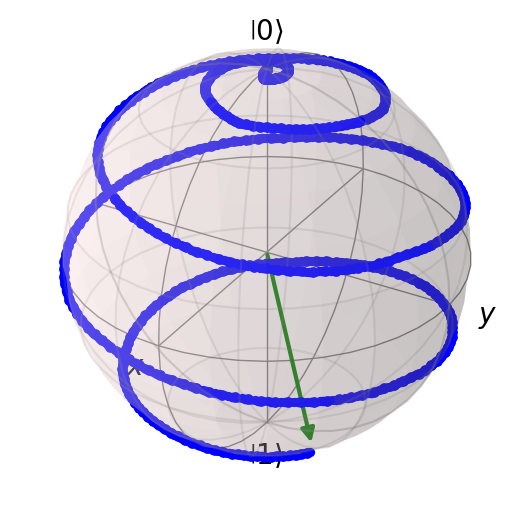

In [17]:
b = Bloch()
irho_mid = np.matrix(irho_init)
point_list = []
z = []
y = []

for i in combination:
    instant_U = unitary(dt, i)
    irho_mid = (instant_U @ irho_mid @ instant_U.conj().T)
    point = [np.trace(irho_mid * sx).real,
             np.trace(irho_mid * sy).real,
             np.trace(irho_mid * sz).real]
    b.add_points(point, 'm')
    print(point)
    z.append(np.trace(irho_mid * sz).real)
    y.append(np.trace(irho_mid * sy).real)
    point_list.append(point)
    print(state_fidelity(irho_target, irho_mid))

vector = np.array([np.trace(irho_target * sx).real,
             np.trace(irho_target * sy).real,
             np.trace(irho_target * sz).real])

print(state_fidelity(irho_target, irho_mid))

b.vector_color=['g']
b.add_vectors(vector)
# b.vector_color=['g']
#b.add_vectors([0,0,1],colors = 'r')
b.point_marker = ['o']
b.show()

In [18]:
state_fidelity(irho_mid, irho_target)

0.987868607571843